# 9.1 주성분을 사용해 특성 줄이기

일련의 특성이 주어졌을 때 데이터의 분산을 유지하면서 특성의 수를 줄임.- 사이킷런의 PCA를 사용해 주성분 분석 수행

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets

# 데이터 로드 
digits = datasets.load_digits()

# 특성 행렬을 표준화 처리

features = StandardScaler().fit_transform(digits.data)
# 99%의 분산을 유지하도록 PCA 클래스 객체를 만듬.
pca = PCA(n_components=0.99, whiten =True)

# PCA를 수행

features_pca = pca.fit_transform(features)

# 결과를 확인

print("본 특성 개수:", features.shape[1])
print("줄어든 특성 개수:", features_pca.shape[1])

본 특성 개수: 64
줄어든 특성 개수: 54


주성분 분석(PCA)은 인기가 많은 선형 차원 축소 기법. PCA는 대부분의 분산을 유지하는 특성 행렬의(아마도 특성보다 더 적은 수의) 주성분에 샘플을 투영. PCA는 비지도 학습 기법. 즉 타깃 벡터의 정보를 사용하지 않고 특성 행렬만 이용.


사이킷런은 pca 객체의 메서드에 PCA를 구현. n_components의 입력 매개변수에 따라 두가지 동작을 수행. 만약 매개변수 값이 1보다 크면 n_componets개수만큼의 특성 반환. 이때 최적의 특성 개수를 어떻게 선택할지 의문이드느데 n_components를 0과 1사이로 지정하면 pcas는 해당 비율의 분산을 유지할 수 있는 최소한의 특성 개수를 반환 주로 0.95와 0.99가 자주 사용. 원본 특성의 95%와 99% 분산을 유지. whiten =True로 지정하면 주성분의 값을 평균이 0이고 분산이 1이 되도록 변환 . solver= 'randomized'는 아주 짧은 시간안에 첫 번째 주성분을 찾아주는 확률적 알고리즘을 사용.

사이킷런의 PCA문서(http://bit.ly/2FrSvyx)
주성분 개수 선택하기(http://bit.ly/2FrSGtH)
선형대수를 사용한 주성분 분석(http://bit.ly/2FuzdIW)

화이트닝(default= False)은 주성분에 투영된 특성의 스케일을 맞추는 역할을 합니다. PCA는 평균을 0으로 맞추기 때문에 화이트닝 옵션 대신 나중에 투영된 특성을 표준화해도 됩니다.

해결에서 사용한 load_digit 함수는 8x8 크기의 손글씨 숫자 데이터 (http://bit.ly/2W4r9YI)를 로드. 주성분에 투영된 처음 두 개의 특성을 사횽해 산점도를 그림




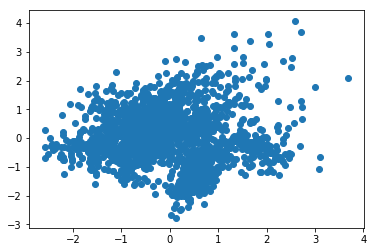

In [12]:
import matplotlib.pyplot as plt

plt.scatter(features_pca[:,0], features_pca[:,1])
plt.show()

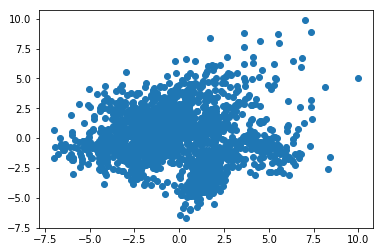

In [14]:
pca_nowhiten = PCA(n_components=0.99)
features_nowhiten = pca_nowhiten.fit_transform(features)
plt.scatter(features_nowhiten[:,0], features_nowhiten[:,1])
plt.show()

In [18]:
pca_nowhiten.components_.shape # pca로 찾은 주성분은 components_ 속성에 저장되어 있음. 해결에서 찾은 주성분은 행을따라 54개가 있음. 
                               # 원본 특성 공간에서 어떤 방향을 나타내므로 이 벡터의 크기는 64

(54, 64)

In [21]:
import numpy as np

# 특성 행렬을 주성분에 투영하려면 components_ 배열을 전치하여 점곰하면 됌. 넘파이 allcloese 함수를 사용해 앞서 구한 features_nowhiten 배열과 
# 동일한지 확인.

np.allclose(features_nowhiten, np.dot(features,pca_nowhiten.components_.T))

True

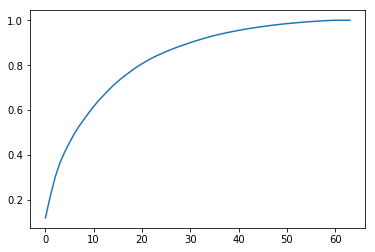

In [22]:
'''
적절한 분산 비율을 선택하기 위해 전체 주성분의 설명된 분산에 유지되는 분산의 양이 크게 늘어나지 않는 지점을 찾을 수 있음. 
n_components 매개변수를 지정하지 않으면 특성 개수만큼 주성분이 만들어짐. 주성분에 의해 설명된 분산은 explained_variance_ratio_ 속성에
저장.
'''

pca = PCA(whiten=True).fit(features)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()


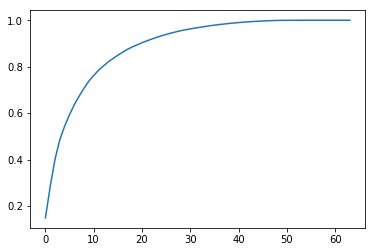

In [23]:
# 표준화하지 않은 원본 데이터를 사용

pca.fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

# 9.2 선형적으로 구분되지 않은 데이터의 차원 축소하기

선형적으로 구분되지 않은 데이터에서 차원을 축소 - 커널 트릭을 사용하는 주성분 분석의 확장을 사용해 비선형 차원 축소를 수행

In [25]:
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_circles

# 선형적으로 구분되지 않는 데이터를 만듬.

features, _ = make_circles(n_samples= 1000, random_state = 1, noise= 0.1 , factor=0.1)


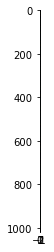

In [32]:
plt.figure()
plt.imshow(features)
plt.show()

In [34]:
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_circles

# 선형적으로 구분되지 않는 데이터를 만듬.

features, _ = make_circles(n_samples= 1000, random_state = 1, noise= 0.1 , factor=0.1)

# 방사 기저 함수(radius basis function, RBF)를 사용햐 커널 PCA를 적용.

kpca = KernelPCA(kernel="rbf", gamma =15, n_components=1)
features_kpca = kpca.fit_transform(features)

print("원본 특성 개수:", features.shape[1])
print("줄어든 특성 개수:",features_kpca.shape[1])

원본 특성 개수: 2
줄어든 특성 개수: 1


사이킷런의 KernelPCA 문서 (http://bit.ly/2HRkxC3)


세바스찬 라시카의 블로그 -RBF 커널 PCA를 사용한 커널 트릭과 비선형 차원 축소(http://bit.ly/2HReP3f)

커널 수학 공식 사이킷런 문서(http://bit.ly/2K16zkD)

# 9.3 클래스 분리를 최대화하여 특성 줄이기

분류 모델에 사용될 특성을 줄이기 - 선형 판별 분석 linear discriminant analysis(LDA)을 사용해 클래스를 최대한 분리하는 성분 축으로 특성 투영

In [37]:
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 붓꽃 데이터셋을 로드

iris =datasets.load_iris()
features = iris.data
target = iris.target

# LDA 객체를 만들고 실행하여 특성을 변화

lda = LinearDiscriminantAnalysis(n_components =1 )
features_lda = lda.fit(features,target).transform(features)

# 특성 개수를 출력
print("원본 특성 개수:", features.shape[1])
print("줄어든 특성 개수:", features_lda.shape[1])

원본 특성 개수: 4
줄어든 특성 개수: 1


explained_variance_ratio_를 사용해 각 성분이 설명하는 분산의 양을 확인 가능.

In [39]:
lda.explained_variance_ratio_ # 하나의 성분이 분산 99%를  설명.

array([0.9912126])

LDA는 분류 알고리즘이짐나 차우너 축소에도 자주 사용되는 기법. LDA는 특성 공간을 저차원 공간으로 투영한다는 점에서 주성분 분석과 비슷. PCA가 데이터에서 분산이 최대 인 성분 축엠나 관심이 있는 반면 LDA는 클래스 간의 차이를 최대화하는 추가적인 목적을 가짐. 

# 9.4 행렬 분해를 사용해 특성 줄이기


음수가 아닌 특성 행렬이 있을 때 차우너을 축소  - 비음수 행렬 분해 non-negative matrix Factorization(NMF)를 사용해 특성 행렬의 차원을 축소


In [51]:
from sklearn.decomposition import NMF
from sklearn import datasets 

# 데이터를 로드

digits = datasets.load_digits()

# 특성 행렬을 로드
features = digits.data

# NMF를 만들고 학습하고 적용

nmf = NMF(n_components= 10, random_state = 1)
features_nmf = nmf.fit_transform(features)

# 결과를 출력
print("원본 특성 개수:", features.shape[1])
print("줄어든 특성 개수:", features_nmf.shape[1])

원본 특성 개수: 64
줄어든 특성 개수: 10


In [43]:
features.shape

(1797, 64)

In [45]:
features_nmf.shape

(1797, 10)

# 붙임

In [52]:
nmf.components_.shape

(10, 64)

In [53]:
np.all(nmf.components_ >= 0)

True

In [54]:
np.mean(features - np.dot(features_nmf, nmf.components_))

-0.20062043744127844

In [55]:
nmf_mu = NMF(n_components=10, solver='mu', random_state=1)
features_nmf_mu = nmf_mu.fit_transform(features)

In [56]:
np.mean(features - np.dot(features_nmf_mu, nmf_mu.components_))

-0.1262994558568114

## 9.5 희소한 데이터의 특성을 줄이기

희소 특성 행렬의 차원을 축소 - TVSD(truncated singular value decomposition)를 사용.


In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn import datasets
import numpy as np

digits = datasets.load_digits()

# 특성 행렬을 표준화 처리

features = StandardScaler().fit_transform(digits.data)


# 희소행렬 생성
features_spares = csr_matrix(features)
print(features_spares)

  (0, 1)	-0.3350164872543856
  (0, 2)	-0.04308101770538793
  (0, 3)	0.2740715207154218
  (0, 4)	-0.6644775126361527
  (0, 5)	-0.8441293865949171
  (0, 6)	-0.40972392088346243
  (0, 7)	-0.1250229232970408
  (0, 8)	-0.05907755711884675
  (0, 9)	-0.6240092623290964
  (0, 10)	0.4829744992519545
  (0, 11)	0.7596224512649244
  (0, 12)	-0.05842586308220443
  (0, 13)	1.1277211297338117
  (0, 14)	0.8795830595483867
  (0, 15)	-0.13043338063115095
  (0, 16)	-0.04462507326885248
  (0, 17)	0.11144272449970435
  (0, 18)	0.8958804382797294
  (0, 19)	-0.8606663175537699
  (0, 20)	-1.1496484601880896
  (0, 21)	0.5154718747277965
  (0, 22)	1.905963466976408
  (0, 23)	-0.11422184388584329
  (0, 24)	-0.03337972630405602
  (0, 25)	0.48648927722411006
  :	:
  (1796, 38)	-0.8226945146290309
  (1796, 40)	-0.061343668908253476
  (1796, 41)	0.8105536026095989
  (1796, 42)	1.3950951873625397
  (1796, 43)	-0.19072005925701047
  (1796, 44)	-0.5868275383619802
  (1796, 45)	1.3634658076459107
  (1796, 46)	0.58749033

In [61]:
features.shape

(1797, 64)

In [65]:
# TSVD 객체 생성
tvsd = TruncatedSVD(n_components=10)

# 희소 행렬에 TVSD를 적용.

features_spares_tvsd = tvsd.fit(features_spares).transform(features_spares)

# 결과 출력.

print("원본 특성 개수:", features_spares.shape[1])
print("줄어든 특성 개수:", features_spares_tvsd.shape[1])


원본 특성 개수: 64
줄어든 특성 개수: 10
